In [77]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
#Read data file obtained from datos.gov.co

#Select the columns that we want to parse as dates.
date_cols = ['Fecha de Firma', 'Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
             'Fecha de Fin de Ejecucion', 'Ultima Actualizacion', 'Fecha Inicio Liquidacion', 'Fecha Fin Liquidacion',]

df = pd.read_csv("C:/Users/User/Downloads/ds4a-secopII/SECOP_II_-_Contratos_Electr_nicos.csv", parse_dates=date_cols, low_memory=False)
print('The shape of the original dataset is : ' + str(df.shape))

In [ ]:
#Check for missing values within the dataset
msn.bar(df.sample(300000))

In [78]:
#Select Columns to delete
delete_list = ['Nit Entidad', 'Proceso de Compra', 'Localización', 'Ciudad', 'ID Contrato', 'Referencia del Contrato',
               'Codigo de Categoria Principal', 'Descripcion del Proceso', 'Fecha de Firma', 
               'Justificacion Modalidad de Contratacion', 'Condiciones de Entrega', 'TipoDocProveedor', 
               'Documento Proveedor', 'Proveedor Adjudicado', 'Habilita Pago Adelantado', 'Liquidación',
               'Reversion', 'Estado BPIN', 'Código BPIN', 'Anno BPIN', 'Saldo CDP', 'Saldo Vigencia',
               'URLProceso', 'Puntos del Acuerdo', 'Pilares del Acuerdo', 'Nombre Representante Legal',
               'Nacionalidad Representante Legal','Tipo de Identificación Representante Legal',
               'Género Representante Legal', 'Ultima Actualizacion', 'Codigo Entidad', 'Fecha Inicio Liquidacion',
               'Fecha Fin Liquidacion', 'Codigo Proveedor', 'Objeto del Contrato', 'Identificación Representante Legal']

#Dataset cleaned version 1
df_cleanv1 = df.drop(delete_list, axis=1)

In [79]:
df_cleanv1.shape

(1715902, 35)

In [80]:
#Normalizing 'Departamento' column
dic = {'Distrito Capital de Bogotá':'Bogotá, D.C.', 'Quindío':'Quindio',
       'San Andrés, Providencia y Santa Catalina':'Archipiélago De San Andrés, Providencia Y Santa Catalina'}

df_cleanv1['Departamento'] = df_cleanv1.Departamento.replace(dic)

In [81]:
#Dataset cleaned version 2. Cleaning missing or undefined values in column 'Departamento'
df_cleanv2 = df_cleanv1[(df_cleanv1["Departamento"] != "No Definido") | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv2.shape

(1707212, 35)

In [82]:
#Dataset cleaned version 3. Cleaning missing or undefined values in column 'EsPostConflicto'
df_cleanv3 = df_cleanv2[(df_cleanv2['EsPostConflicto']!='ND') | (df_cleanv2["Dias Adicionados"] != 0)]
df_cleanv3.shape

(1705382, 35)

In [83]:
#Dataset cleaned version 4. Cleaning missing or undefined values in column 'Orden'
df_cleanv4 = df_cleanv3[(df_cleanv3['Orden']!='No Definido') | (df_cleanv3["Dias Adicionados"] != 0)]
df_cleanv4.shape

(1705378, 35)

In [84]:
#Dataset cleaned version 5. Cleaning missing or undefined values in column 'Sector'. No deleted rows
df_cleanv5 = df_cleanv4[(df_cleanv4['Sector']!='No Definido') | (df_cleanv4["Dias Adicionados"] != 0)]
df_cleanv5.shape

(1705378, 35)

In [85]:
#Dataset cleaned version 6. Cleaning missing or undefined values in column 'Rama'. No deleted rows
df_cleanv6 = df_cleanv5[(df_cleanv5['Rama']!='No Definido') | (df_cleanv5["Dias Adicionados"] != 0)]
df_cleanv6.shape

(1705378, 35)

In [86]:
#Dataset cleaned version 7. Cleaning missing or undefined values in column 'Tipo de Contrato'.
df_cleanv7 = df_cleanv6[(df_cleanv6['Tipo de Contrato']!='No Especificado') | (df_cleanv6["Dias Adicionados"] != 0)]
df_cleanv7.shape

(1703631, 35)

In [87]:
#Dataset cleaned version 8. Cleaning missing or undefined values in column 'Modalidad de Contratacion'.
df_cleanv8 = df_cleanv7[(df_cleanv7['Modalidad de Contratacion']!="Concurso de méritos con precalificación") | (df_cleanv7["Dias Adicionados"] != 0)]
df_cleanv8.shape

(1703631, 35)

In [89]:
#Dataset cleaned version 8.1 Cleaning missing or undefined values in column 'Modalidad de Contratacion'.
df_cleanv8_1 = df_cleanv8[(df_cleanv8['Destino Gasto']!="No Definido") | (df_cleanv8["Dias Adicionados"] != 0)]
df_cleanv8_1.shape

(1680196, 35)

In [90]:
#Normalizing 'Modalidad de Contratacion' column
dic = {'Enajenación de bienes con sobre cerrado':'Enajenación de bienes', 
        'Enajenación de bienes con subasta':'Enajenación de bienes'}

df_cleanv8_1['Modalidad de Contratacion'] = df_cleanv8_1['Modalidad de Contratacion'].replace(dic)

In [91]:
df_cleanv8_1[(df_cleanv8_1['Fecha de Inicio del Contrato'].isna()==False) | (df_cleanv8_1["Dias Adicionados"] != 0)].shape

(1565453, 35)

In [92]:
#Dataset cleaned version 9 and 10. Cleaning Nulls in 'Fecha de Inicio del Contrato' and 'Fecha de Fin del Contrato' columns
df_cleanv9 = df_cleanv8_1[df_cleanv8_1['Fecha de Inicio del Contrato'].isna()==False]
df_cleanv10 = df_cleanv9[df_cleanv9['Fecha de Fin del Contrato'].isna()==False]
df_cleanv10.shape

(1565451, 35)

In [93]:
df_cleanv9[(df_cleanv9['Fecha de Fin del Contrato'].isna()==False) | (df_cleanv1["Dias Adicionados"] != 0)].shape

(1565451, 35)

In [94]:
df_cleanv10[df_cleanv10['Fecha de Inicio del Contrato'].dt.year <= 2019].shape

(315371, 35)

In [95]:
df_cleanv10[(df_cleanv10['Fecha de Inicio del Contrato'].dt.year <= 2019) & (df_cleanv1["Dias Adicionados"] != 0)].shape

(22463, 35)

In [96]:
#Dataset cleaned version 11. Convert 'Fecha de Fin del Contrato' and 'Fecha de Fin de Ejecucion' as date data types
df_cleanv10['Fecha de Fin del Contrato'] = pd.to_datetime(df_cleanv10['Fecha de Fin del Contrato'], errors = 'coerce')
df_cleanv10['Fecha de Fin de Ejecucion'] = pd.to_datetime(df_cleanv10['Fecha de Fin de Ejecucion'], errors = 'coerce')

df_cleanv10['Fecha de Fin del Contrato'] = df_cleanv10['Fecha de Fin del Contrato'].astype('datetime64[ns]')
df_cleanv10['Fecha de Fin de Ejecucion'] = df_cleanv10['Fecha de Fin de Ejecucion'].astype('datetime64[ns]')

In [97]:
#Create new column Origen de los Recursos as multiple binary columns.

variables_a_crear = ['PGN', 'SGP', 'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC']
variables_reales = ['Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                     'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                     'Recursos Propios','Recursos de Credito']
                     
for i,j in zip(variables_a_crear,variables_reales):
    df_cleanv10[i] = (df_cleanv10[j] > 0).astype(int)

In [98]:
#Dataset cleaned version 12. Delete columns previously binarized
delete_list = [ 'Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                'Recursos Propios','Recursos de Credito', 'Origen de los Recursos']

df_cleanv11 = df_cleanv10.drop(delete_list, axis=1)
df_cleanv11.shape

(1565451, 34)

In [99]:
#Initial data clean included deletion of those projects with no money assigned
#boolean_mask = (df_cleanv12.loc[:,['PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']].sum(axis=1)) > 0
#df_cleanv13 = df_cleanv12[ boolean_mask ]
df_cleanv12 = df_cleanv11

In [100]:
df_cleanv12.shape

(1565451, 34)

In [101]:
print(df_cleanv12.columns)

Index(['Nombre Entidad', 'Departamento', 'Orden', 'Sector', 'Rama',
       'Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Es Grupo', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'EsPostConflicto', 'Destino Gasto', 'Dias Adicionados', 'PGN', 'SGP',
       'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC'],
      dtype='object')


In [102]:
#Construct dependent variable Y 
def feature_engineer(days_added, date_init, date_finish):
    
    contract_duration = abs(date_init - date_finish).days
    
    if contract_duration == 0 and days_added != 0:
        Normalized_Delay = 1
    elif contract_duration == 0 and days_added == 0:
        Normalized_Delay = 0 
    else:
        Normalized_Delay = days_added/contract_duration
    
    if Normalized_Delay == 0:
        delay = 0
    elif Normalized_Delay > 0 and Normalized_Delay < 0.2:
        delay = 1
    elif Normalized_Delay >= 0.2 and Normalized_Delay < 0.7:
        delay = 2
    elif Normalized_Delay >= 0.7: 
        delay = 3
            
    return delay

In [103]:
#Dataset cleaned version 14. Delete one record with NAT in 'Fecha de Fin del Contrato' column
df_cleanv13 = df_cleanv12[df_cleanv12['Fecha de Fin del Contrato'].isna() != True]
df_cleanv13.shape

(1565450, 34)

In [104]:
df_cleanv13['Delay'] = df_cleanv13.apply(lambda x: feature_engineer(x['Dias Adicionados'],
                                                  x['Fecha de Inicio del Contrato'],
                                                  x['Fecha de Fin del Contrato']), axis=1)

In [105]:
print('The shape of the cleaned dataset is : ' + str(df_cleanv13.shape))

The shape of the cleaned dataset is : (1565450, 35)


In [ ]:
#Check for missing values within the dataset
msn.bar(df_cleanv13)

**Findings:**

1. There are 366400 rows in column 'Fecha de Inicio de Ejecucion' with valid dates (no NAT)
2. There are 370887 rows in column 'Fecha de Fin de Ejecucion' with valid dates (no NAT)

In [106]:
#Projects with same date in 'Fecha de Inicio del Contrato' and 'Fecha de Inicio de Ejecucion' columns
df_cleanv13[df_cleanv13['Fecha de Inicio del Contrato'] == df_cleanv13['Fecha de Inicio de Ejecucion']].shape

(297102, 35)

In [107]:
#Projects with same date in 'Fecha de Fin del Contrato' and 'Fecha de Fin de Ejecucion' columns
df_cleanv13[df_cleanv13['Fecha de Fin del Contrato'] == df_cleanv13['Fecha de Fin de Ejecucion']].shape

(295775, 35)

In [108]:
#Results in the two previous cells indicates that those dates are very similar most of the cases, so it is valid 
#to delete 'Fecha de Inicio de Ejecucion' and 'Fecha de Fin de Ejecucion' columns from dataframe
df_cleanv14 = df_cleanv13.drop(['Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion'], axis=1)
df_cleanv14.shape

(1565450, 33)

In [109]:
# Export the cleaned dataset to a csv file
#df_cleanv14.to_csv('../SECOP_Electronicos_Cleaned.csv')

In [110]:
pre_X = df_cleanv14.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                            'Rama','Entidad Centralizada',
                                            'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                            'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
                                            'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
                                            'EsPostConflicto', 'Destino Gasto',
                                            'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

<AxesSubplot:>

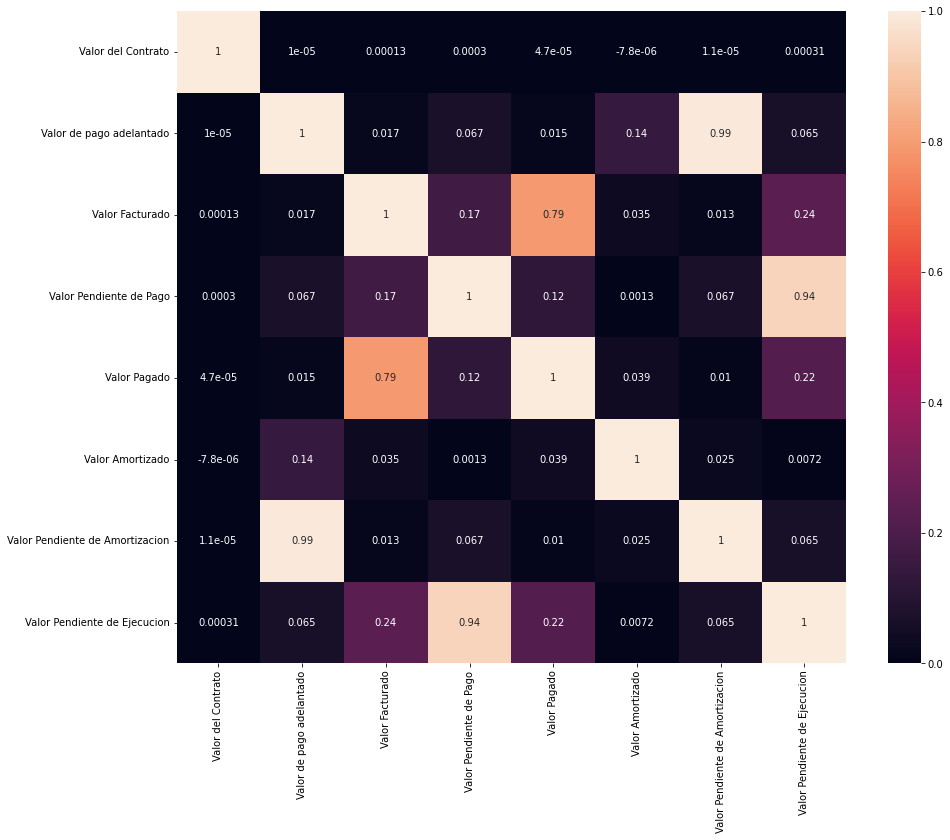

In [111]:
corr = (pre_X.iloc[:,10:18]).corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

In [112]:
pre_X2 =                              pre_X[['Departamento','Orden','Sector',
                                            'Rama','Entidad Centralizada',
                                            'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                            'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                            'EsPostConflicto', 'Destino Gasto',
                                            'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

<AxesSubplot:>

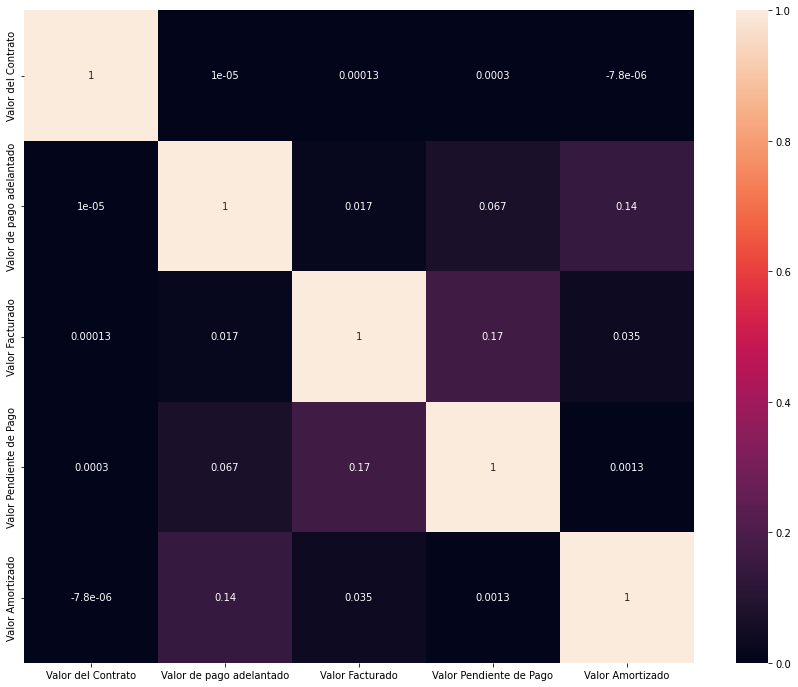

In [113]:
corr = (pre_X.loc[:,['Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado']]).corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

In [114]:
pre_X2['Destino Gasto'].value_counts()

Inversión         958637
Funcionamiento    606117
No Definido          696
Name: Destino Gasto, dtype: int64

In [122]:
cat_cols = ['Departamento', 'Orden', 'Sector', 'Rama','Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
            'Es Grupo','Es Pyme', 'Destino Gasto', 'EsPostConflicto']
cat_values = {key:'category' for key in cat_cols}
pre_X2 = pre_X2.astype(cat_values)

In [123]:
pre_X2.dtypes

Departamento                 category
Orden                        category
Sector                       category
Rama                         category
Entidad Centralizada         category
Estado Contrato              category
Tipo de Contrato             category
Modalidad de Contratacion    category
Es Grupo                     category
Es Pyme                      category
Valor del Contrato              int64
Valor de pago adelantado        int64
Valor Facturado                 int64
Valor Pendiente de Pago         int64
Valor Amortizado                int64
EsPostConflicto              category
Destino Gasto                category
PGN                             int32
SGP                             int32
SGR                             int32
RP_AGR                          int32
RP_NO_AGR                       int32
RC                              int32
dtype: object

In [125]:
y = df_cleanv14['Delay'].astype('category')

X = pre_X2

In [126]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [133]:
# Importación y definición de modelo XGBClassifier

from xgboost import XGBClassifier
from sklearn import metrics 

clf = XGBClassifier(tree_method="gpu_hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


[15:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [134]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.5816724396194679, 0.8998855979202437)